# 1. Import Library

In [415]:
import os
import pandas as pd
import difflib
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [416]:
path_electricity_generation_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\Electricity_Generation_Processed.csv"
path_population_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\population_monthly.csv"
path_sunshine_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\sunshine_monthly.csv"
path_humidity_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\vietnam-humidity-handled-data.csv"
path_rainfall_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\vietnam-rainfall-handled-data.csv"
path_temperature_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\vietnam-temperature-handled-data.csv"

In [417]:
path_electricity_generation_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\Electricity_Generation_Processed.csv"
path_population_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\population_monthly.csv"
path_sunshine_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\sunshine_monthly.csv"
path_humidity_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\vietnam-humidity-handled-data.csv"
path_rainfall_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\vietnam-rainfall-handled-data.csv"
path_temperature_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\vietnam-temperature-handled-data.csv"

In [418]:
electricity_df_train = pd.read_csv(path_electricity_generation_train)
population_df_train = pd.read_csv(path_population_train)
sunshine_df_train = pd.read_csv(path_sunshine_train)
humidity_df_train = pd.read_csv(path_humidity_train)
rainfall_df_train = pd.read_csv(path_rainfall_train)
temperature_df_train = pd.read_csv(path_temperature_train)

In [419]:
electricity_df_test = pd.read_csv(path_electricity_generation_test)
population_df_test = pd.read_csv(path_population_test)
sunshine_df_test = pd.read_csv(path_sunshine_test)
humidity_df_test = pd.read_csv(path_humidity_test)
rainfall_df_test = pd.read_csv(path_rainfall_test)
temperature_df_test = pd.read_csv(path_temperature_test)

In [420]:
path_electricity_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\electricity.pkl"
path_population_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\population.pkl"
path_sunshine_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\sunshine.pkl"
path_humidity_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\humidity.pkl"
path_rainfall_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\rainfall.pkl"
path_temperature_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\temperature.pkl"

In [421]:
# List các đường dẫn
paths = [
    path_electricity_generation_train,
    path_population_train,
    path_sunshine_train,
    path_humidity_train,
    path_rainfall_train,
    path_temperature_train,
]

In [422]:
YEARS = [year for year in range(2002, 2023)]

In [423]:
MONTHS = [month for month in range(1, 13)]

# 2. Prediction Using ARIMA Model

## 2.1 Check for stationarity using time series plotting

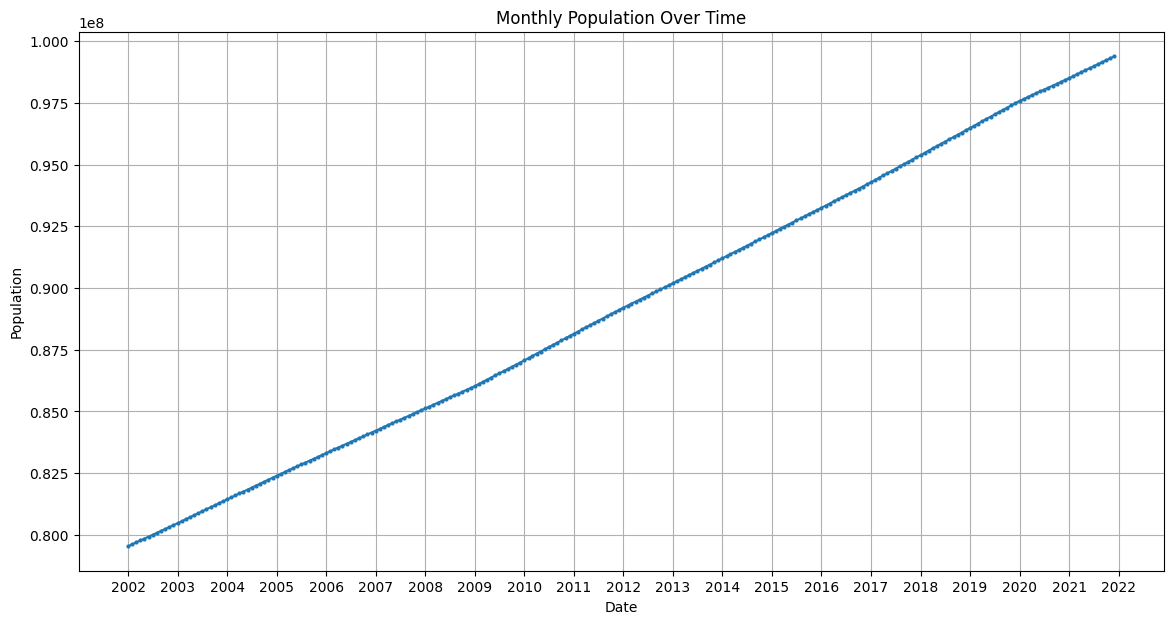

In [424]:
population_df_train['Date'] = pd.to_datetime(population_df_train['Date'])

plt.figure(figsize=(14, 7))
plt.plot(population_df_train['Date'], population_df_train['Population'], marker='o', markersize=2)

# Setting x-axis ticks to display one tick per year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Population')
plt.title('Monthly Population Over Time')

plt.grid(True)
plt.show()


## 2.2 Check for stationarity using time series plotting using ACF Plot and PACF Plot

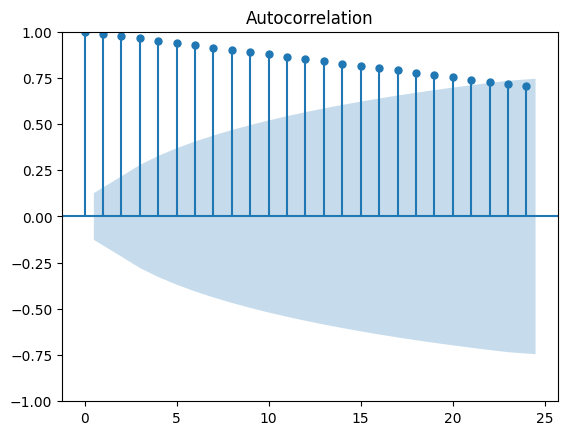

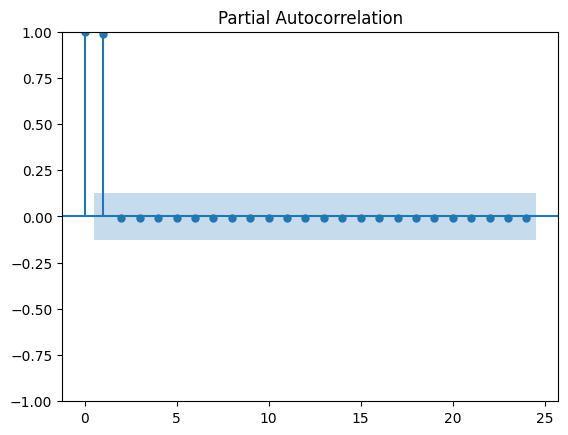

In [425]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'population_df' is your DataFrame
# Select the 'Population' column
population_series_train = population_df_train['Population']

# Plot ACF and PACF
acf_original = plot_acf(population_series_train)
pacf_original = plot_pacf(population_series_train)

## 2.3 Check for stationarity using time series plotting using ADF test

In [426]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(population_series_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.9837243452632933


## 2.4 Transform to stationary: differencing

<Axes: >

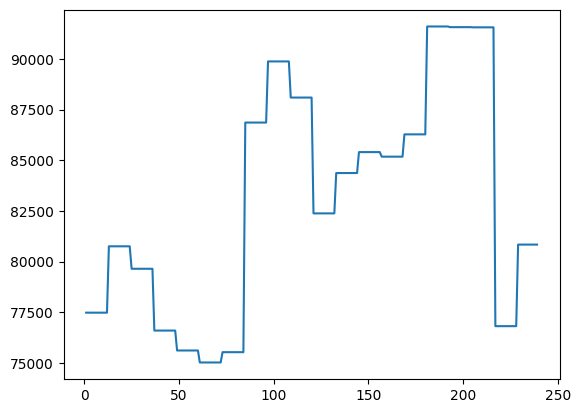

In [427]:
df_train_diff1 = population_series_train.diff().dropna()
df_train_diff1.plot()

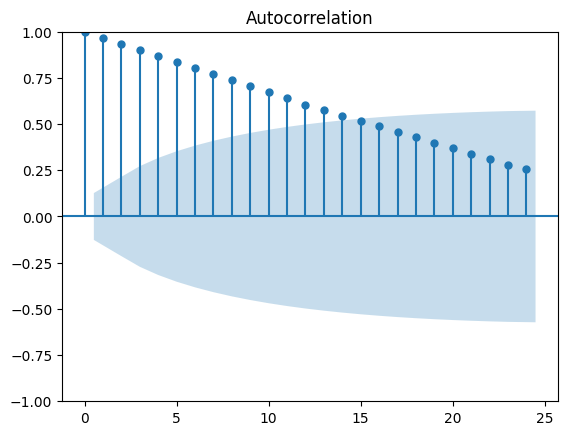

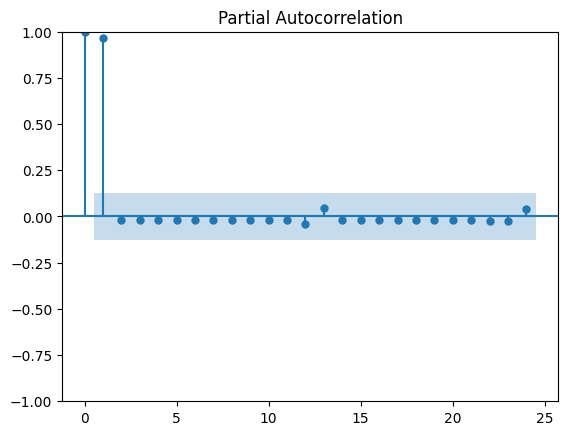

In [428]:
acf_diff1 = plot_acf(df_train_diff1)
pacf_diff1 = plot_pacf(df_train_diff1)

In [429]:
adf_test1 = adfuller(df_train_diff1)
print(f'p-value: {adf_test1[1]}')

p-value: 0.2779901712394786


<Axes: >

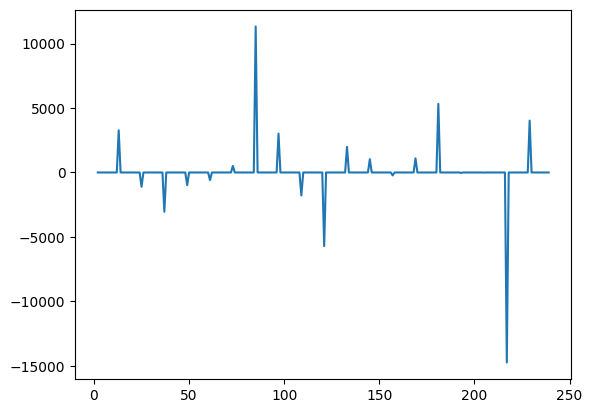

In [430]:
# Calculate the second differenced series
df_train_diff2 = df_train_diff1.diff().dropna()
df_train_diff2.plot()

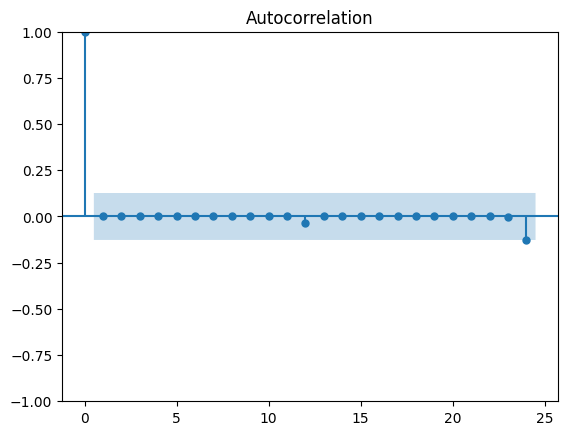

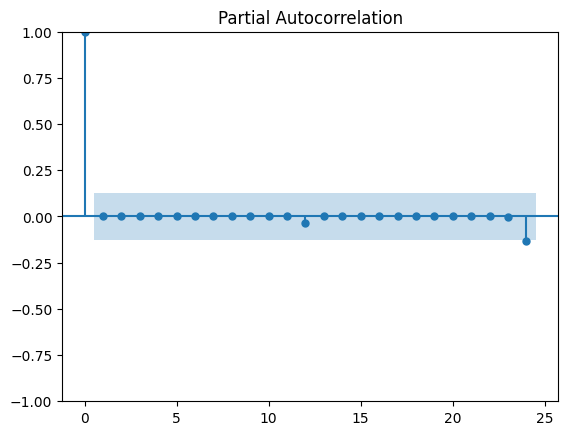

In [431]:
acf_diff2 = plot_acf(df_train_diff2)
pacf_diff2 = plot_pacf(df_train_diff2)

In [432]:
adf_test2 = adfuller(df_train_diff2)
print(f'p-value: {adf_test2[1]}')

p-value: 3.9427671696772263e-28


## 2.5: Determine ARIMA models parameters p, q

Giải thích....

## 2.5 Grid Search using Auto-fit to survey parameters p, d, q

In [433]:
import pmdarima as pm

auto_arima = pm.auto_arima(population_series_train, 
                           start_p=0, start_d=0, start_q=0,
                           max_p=5, max_d=5, max_q=5,
                           start_P=0, seasonal=False,
                           d=None, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)  # Không cố định d

print(auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4126.687, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4128.712, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=4128.744, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4124.719, Time=0.00 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=4130.723, Time=0.10 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.163 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2061.360
Date:                Sun, 26 May 2024   AIC                           4124.719
Time:                        22:16:18   BIC                           4128.192
Sample:                             0   HQIC                          4126.119
                                - 240                                       

## 2.6 Fit the ARIMA model

In [434]:
from statsmodels.tsa.arima.model import ARIMA

# Tạo mô hình ARIMA với tham số (0, 2, 0)
population_model = ARIMA(population_series_train, order=(0, 2, 0))

# Huấn luyện mô hình
fitted_population_model = population_model.fit()

# In ra tóm tắt mô hình
print(fitted_population_model.summary())

                               SARIMAX Results                                
Dep. Variable:             Population   No. Observations:                  240
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -2061.360
Date:                Sun, 26 May 2024   AIC                           4124.719
Time:                        22:16:18   BIC                           4128.192
Sample:                             0   HQIC                          4126.119
                                - 240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.936e+06   2.93e+04     66.028      0.000    1.88e+06    1.99e+06
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             49110.46
Prob(Q):                              1.00   Pr

In [435]:
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Lưu mô hình vào file
joblib.dump(fitted_population_model, path_population_model)

['D:\\Code\\BachKhoa\\Khoa Hoc Du Lieu\\eletricity-generation-predictor\\MODEL\\population.pkl']

## 2.7 Make time series predictions

In [436]:
population_series_test = population_df_test['Population']

In [437]:
# Giả sử chỉ mục của train kết thúc ở 99 và test bắt đầu từ 100
# Đây là giả định, bạn cần kiểm tra dữ liệu cụ thể của mình
print("Last index of train data:", population_series_train.index[-1])
print("First index of test data:", population_series_test.index[0])

# Đặt lại chỉ mục cho test data để nó tiếp nối sau train data
start_index = population_series_train.index[-1] + 1  # bắt đầu sau index cuối của train
end_index = start_index + len(population_series_test)  # kết thúc sau đó bằng độ dài của test
population_series_test.index = range(start_index, end_index)

# Nối hai series
population_series = pd.concat([population_series_train, population_series_test])

# Hiển thị một số giá trị đầu và cuối để kiểm tra
print(population_series.head())
print(population_series.tail())


Last index of train data: 239
First index of test data: 0
0    79537700.0
1    79615175.0
2    79692650.0
3    79770125.0
4    79847600.0
Name: Population, dtype: float64
247    9.998415e+07
248    1.000570e+08
249    1.001298e+08
250    1.002026e+08
251    1.002754e+08
Name: Population, dtype: float64


In [438]:
# Tải mô hình từ file
loaded_population_model = joblib.load(path_population_model)

population_series_prediction = loaded_population_model.forecast(len(population_series_test))

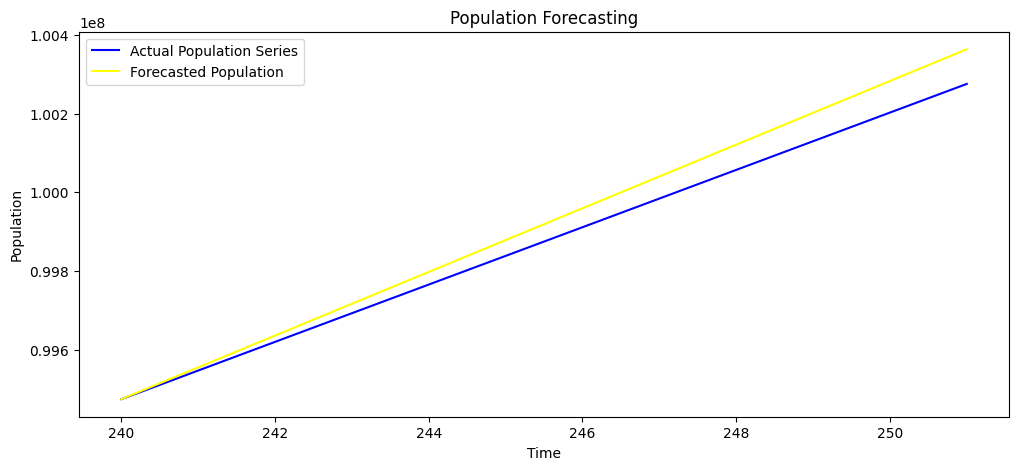

In [439]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để vẽ
plt.figure(figsize=(12, 5))

# Vẽ chuỗi dữ liệu thực tế
plt.plot(population_series_test, color='blue', label='Actual Population Series')

# Vẽ chuỗi dự đoán
# Lưu ý: Cần cộng chỉ số bắt đầu của population_series_prediction để nó tiếp nối đúng với dữ liệu thực tế
prediction_index = range(len(population_series_train), len(population_series_train) + len(population_series_prediction))
plt.plot(prediction_index, population_series_prediction, color='yellow', label='Forecasted Population')

# Thêm tiêu đề và nhãn
plt.title('Population Forecasting')
plt.xlabel('Time')
plt.ylabel('Population')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


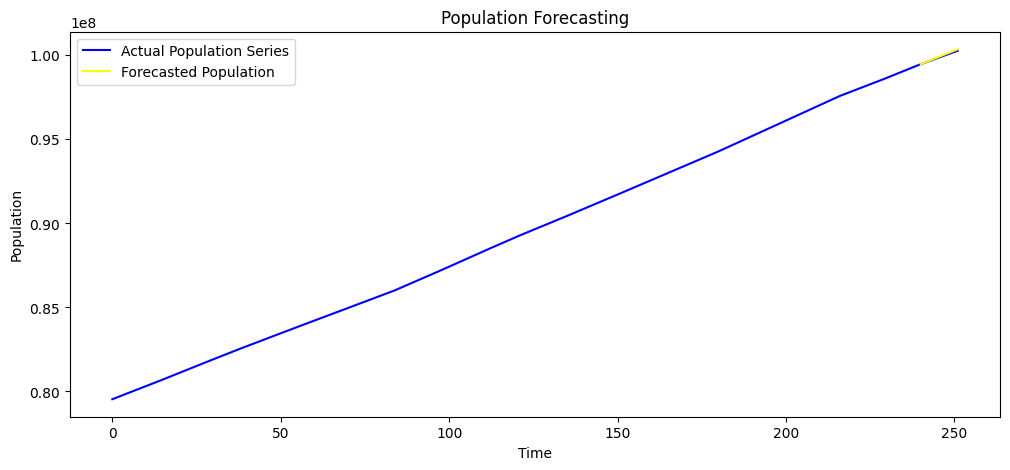

In [440]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để vẽ
plt.figure(figsize=(12, 5))

# Vẽ chuỗi dữ liệu thực tế
plt.plot(population_series, color='blue', label='Actual Population Series')

# Vẽ chuỗi dự đoán
# Lưu ý: Cần cộng chỉ số bắt đầu của population_series_prediction để nó tiếp nối đúng với dữ liệu thực tế
prediction_index = range(len(population_series_train), len(population_series_train) + len(population_series_prediction))
plt.plot(prediction_index, population_series_prediction, color='yellow', label='Forecasted Population')

# Thêm tiêu đề và nhãn
plt.title('Population Forecasting')
plt.xlabel('Time')
plt.ylabel('Population')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


## 2.8 Evaluate model predictions

In [441]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(population_series_test, population_series_prediction)
mape = mean_absolute_percentage_error(population_series_test, population_series_prediction)
rmse = np.sqrt(mean_squared_error(population_series_test, population_series_prediction))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 44087.083333333336
mape - manual: 0.0004407284031023954
rmse - manual: 52051.50792869447


# 3. Prediction Using SARIMA Model

## 3.1 Temperature Data

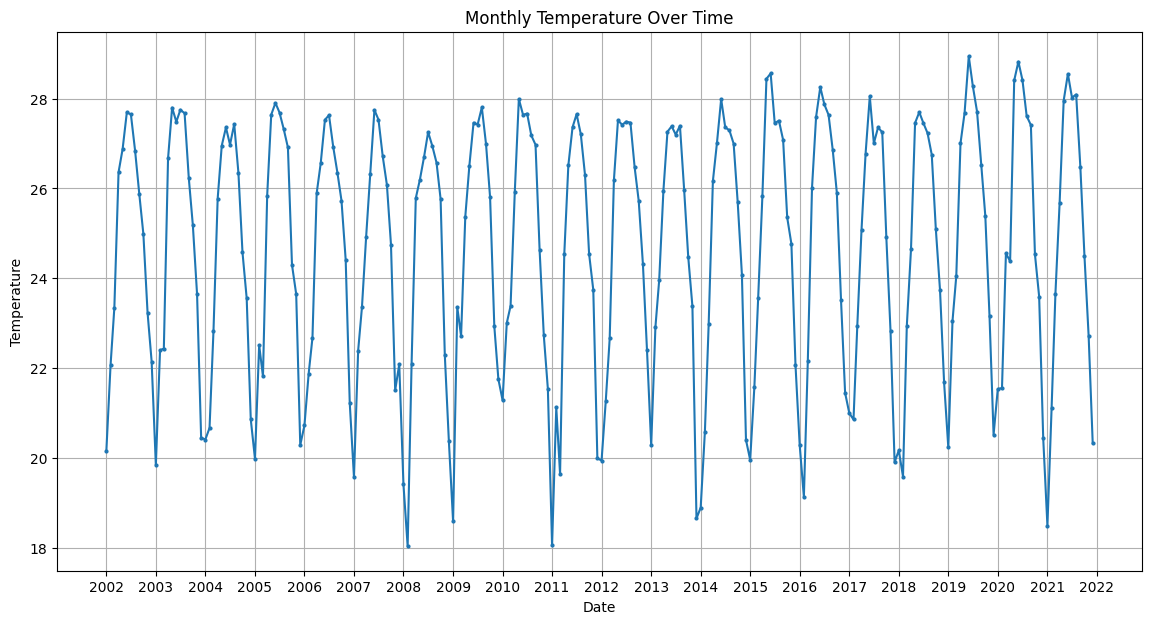

In [444]:
temperature_df_train['Date'] = pd.to_datetime(temperature_df_train['Date'])

plt.figure(figsize=(14, 7))
plt.plot(temperature_df_train['Date'], temperature_df_train['Temperature'], marker='o', markersize=2)

# Setting x-axis ticks to display one tick per year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Monthly Temperature Over Time')

plt.grid(True)
plt.show()


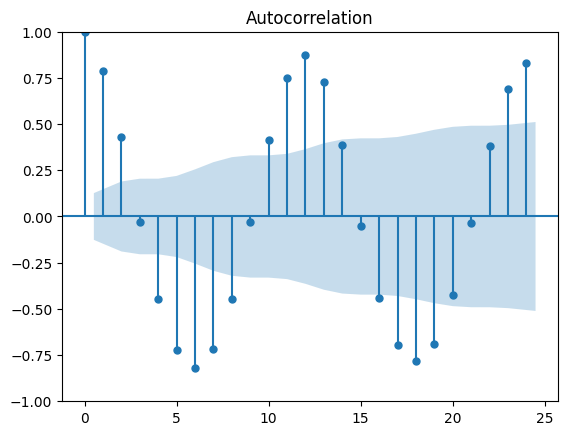

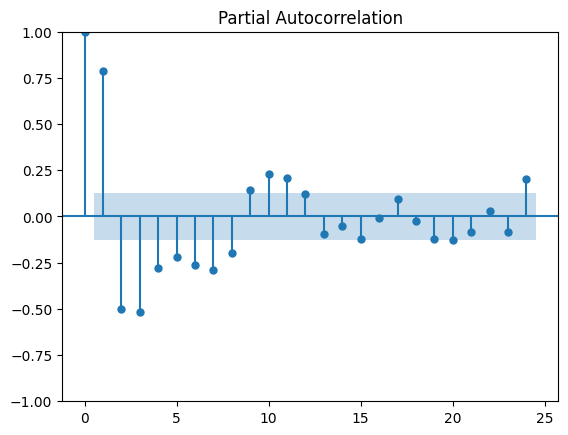

In [445]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'temperature_df' is your DataFrame
# Select the 'Temperature' column
temperature_series_train = temperature_df_train['Temperature']

# Plot ACF and PACF
acf_original = plot_acf(temperature_series_train)
pacf_original = plot_pacf(temperature_series_train)

In [446]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(temperature_series_train)
print(f'p-value: {adf_test[1]}')

p-value: 5.413109172437022e-05


In [447]:
import pmdarima as pm

auto_arima = pm.auto_arima(temperature_series_train, 
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           start_P=0, start_D=0, start_Q=0,  # Các tham số mùa vụ ban đầu
                           max_P=3, max_D=1, max_Q=3,        # Giới hạn tham số mùa vụ
                           m=12,                             # Số giai đoạn mùa vụ, ví dụ 12 tháng cho một năm
                           seasonal=True,                    # Kích hoạt mô hình mùa vụ
                           d=0, D=None,                   # Cho phép auto_arima tự động tìm d và D
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(auto_arima.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1184.627, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=934.923, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2224.957, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1015.594, Time=0.02 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=715.965, Time=0.35 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=767.091, Time=0.34 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=932.332, Time=0.91 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=841.078, Time=0.20 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=1111.286, Time=0.70 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=824.877, Time=1.07 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=722.415, Time=0.33 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,2)(1,0,1)[12] intercept   : AI

In [481]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Tạo mô hình SARIMA với các tham số tốt nhất
temperature_model = ARIMA(temperature_series_train, 
                     order=(1, 0, 4), 
                     seasonal_order=(2, 0, 1, 12), 
                     enforce_stationarity=False, 
                     enforce_invertibility=False)

# Huấn luyện mô hình
fitted_temperature_model = temperature_model.fit()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [482]:
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Lưu mô hình vào file
joblib.dump(fitted_temperature_model, path_temperature_model)

['D:\\Code\\BachKhoa\\Khoa Hoc Du Lieu\\eletricity-generation-predictor\\MODEL\\temperature.pkl']

In [483]:
temperature_series_test = temperature_df_test['Temperature']

In [485]:
# Giả sử chỉ mục của train kết thúc ở 99 và test bắt đầu từ 100
# Đây là giả định, bạn cần kiểm tra dữ liệu cụ thể của mình
print("Last index of train data:", temperature_series_train.index[-1])
print("First index of test data:", temperature_series_test.index[0])

# Đặt lại chỉ mục cho test data để nó tiếp nối sau train data
start_index = temperature_series_train.index[-1] + 1  # bắt đầu sau index cuối của train
end_index = start_index + len(temperature_series_test)  # kết thúc sau đó bằng độ dài của test
temperature_series_test.index = range(start_index, end_index)

# Nối hai series
temperature_series = pd.concat([temperature_series_train, temperature_series_test])

# Hiển thị một số giá trị đầu và cuối để kiểm tra
print(temperature_series.head())
print(temperature_series.tail())


Last index of train data: 239
First index of test data: 240
0    20.1471
1    22.0605
2    23.3405
3    26.3616
4    26.8793
Name: Temperature, dtype: float64
247    27.226667
248    26.493333
249    24.586667
250    24.400000
251    19.713333
Name: Temperature, dtype: float64


In [491]:
# Tải mô hình từ file
loaded_temperature_model = joblib.load(path_temperature_model)

temperature_series_prediction = loaded_temperature_model.forecast(len(temperature_series_test))

In [492]:
temperature_series_prediction

240    19.928283
241    20.968307
242    22.982808
243    25.407627
244    27.484920
245    28.153459
246    27.743516
247    27.484377
248    26.869967
249    25.120883
250    23.457394
251    20.706095
Name: predicted_mean, dtype: float64

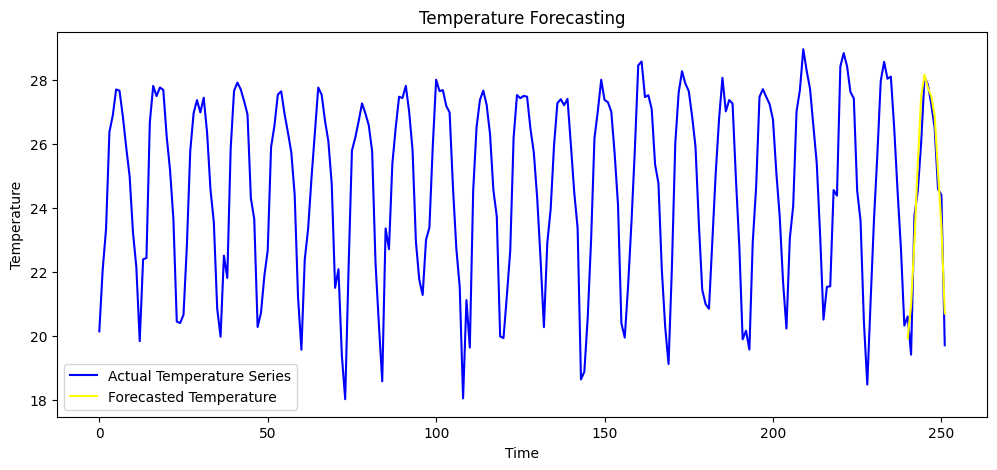

In [493]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để vẽ
plt.figure(figsize=(12, 5))

# Vẽ chuỗi dữ liệu thực tế
plt.plot(temperature_series, color='blue', label='Actual Temperature Series')

# Vẽ chuỗi dự đoán
# Lưu ý: Cần cộng chỉ số bắt đầu của temperature_series_prediction để nó tiếp nối đúng với dữ liệu thực tế
prediction_index = range(len(temperature_series_train), len(temperature_series_train) + len(temperature_series_prediction))
plt.plot(prediction_index, temperature_series_prediction, color='yellow', label='Forecasted Temperature')

# Thêm tiêu đề và nhãn
plt.title('Temperature Forecasting')
plt.xlabel('Time')
plt.ylabel('Temperature')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [494]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(temperature_series_test, temperature_series_prediction)
mape = mean_absolute_percentage_error(temperature_series_test, temperature_series_prediction)
rmse = np.sqrt(mean_squared_error(temperature_series_test, temperature_series_prediction))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 0.7147473104773704
mape - manual: 0.031355110529887
rmse - manual: 0.8501902061160139


## 3.2 Humidity Data

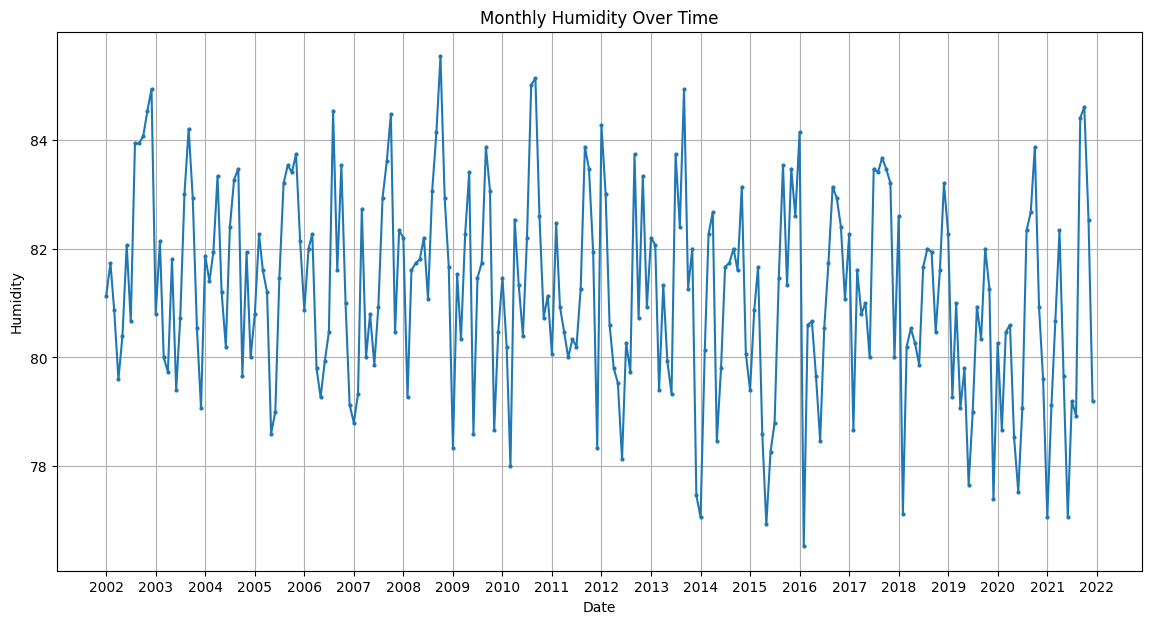

In [495]:
humidity_df_train['Date'] = pd.to_datetime(humidity_df_train['Date'])

plt.figure(figsize=(14, 7))
plt.plot(humidity_df_train['Date'], humidity_df_train['Humidity'], marker='o', markersize=2)

# Setting x-axis ticks to display one tick per year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Monthly Humidity Over Time')

plt.grid(True)
plt.show()


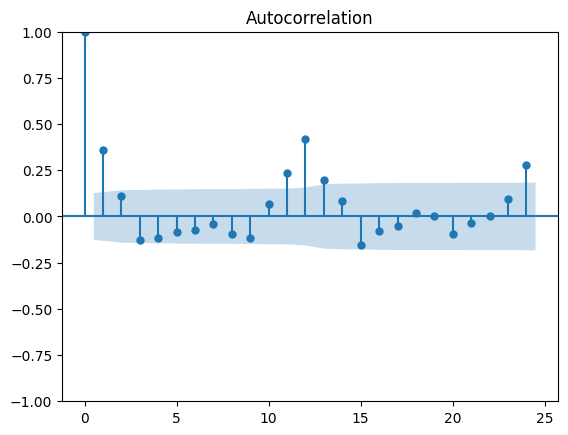

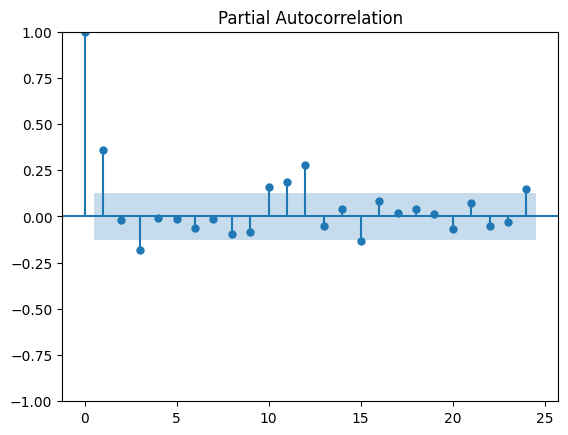

In [496]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'humidity_df' is your DataFrame
# Select the 'humidity' column
humidity_series_train = humidity_df_train['Humidity']

# Plot ACF and PACF
acf_original = plot_acf(humidity_series_train)
pacf_original = plot_pacf(humidity_series_train)

In [497]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(humidity_series_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.09287400271030405


<Axes: >

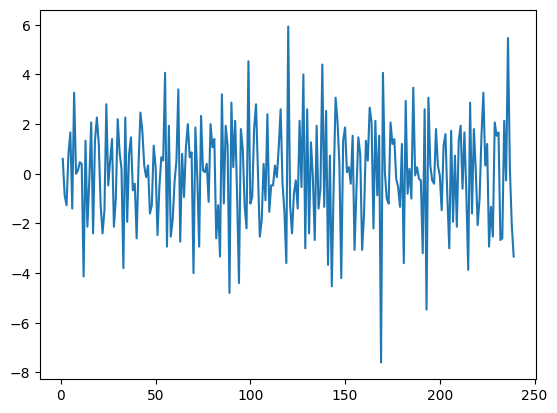

In [498]:
df_train_diff1 = humidity_series_train.diff().dropna()
df_train_diff1.plot()

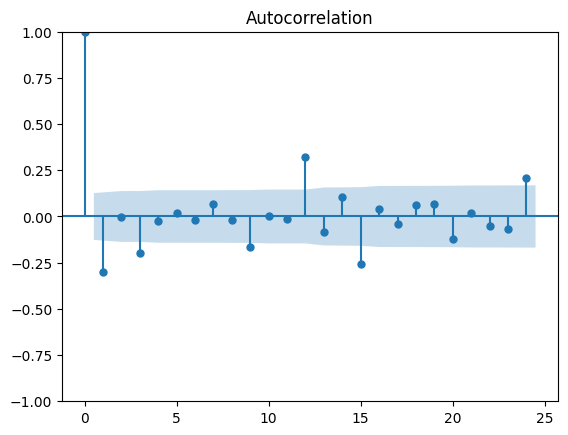

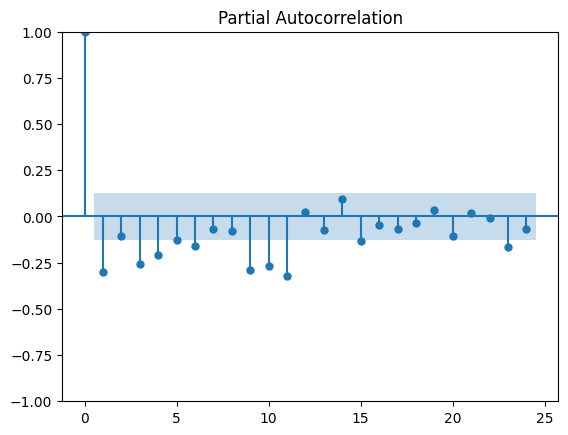

In [499]:
acf_diff1 = plot_acf(df_train_diff1)
pacf_diff1 = plot_pacf(df_train_diff1)

In [500]:
adf_test1 = adfuller(df_train_diff1)
print(f'p-value: {adf_test1[1]}')

p-value: 2.512599917289736e-09


In [501]:
import pmdarima as pm

auto_arima = pm.auto_arima(humidity_series_train, 
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           start_P=0, start_D=0, start_Q=0,  # Các tham số mùa vụ ban đầu
                           max_P=3, max_D=1, max_Q=3,        # Giới hạn tham số mùa vụ
                           m=12,                             # Số giai đoạn mùa vụ, ví dụ 12 tháng cho một năm
                           seasonal=True,                    # Kích hoạt mô hình mùa vụ
                           d=1, D=None,                   # Cho phép auto_arima tự động tìm d và D
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(auto_arima.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1035.951, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=981.699, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1033.955, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1015.330, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=979.215, Time=0.13 sec
 ARIMA(1,1,0)(3,0,0)[12] intercept   : AIC=979.867, Time=0.42 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=973.821, Time=0.17 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=991.142, Time=0.05 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=985.369, Time=0.15 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1008.597, Time=0.07 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=96

In [505]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Tạo mô hình SARIMA với các tham số tốt nhất
humidity_model = ARIMA(humidity_series_train, 
                     order=(3, 1, 1), 
                     seasonal_order=(1, 0, 1, 12), 
                     enforce_stationarity=False, 
                     enforce_invertibility=False)

# Huấn luyện mô hình
fitted_humidity_model = humidity_model.fit()

In [506]:
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Lưu mô hình vào file
joblib.dump(fitted_humidity_model, path_humidity_model)

['D:\\Code\\BachKhoa\\Khoa Hoc Du Lieu\\eletricity-generation-predictor\\MODEL\\humidity.pkl']

In [507]:
humidity_series_test = humidity_df_test['Humidity']

In [508]:
# Giả sử chỉ mục của train kết thúc ở 99 và test bắt đầu từ 100
# Đây là giả định, bạn cần kiểm tra dữ liệu cụ thể của mình
print("Last index of train data:", humidity_series_train.index[-1])
print("First index of test data:", humidity_series_test.index[0])

# Đặt lại chỉ mục cho test data để nó tiếp nối sau train data
start_index = humidity_series_train.index[-1] + 1  # bắt đầu sau index cuối của train
end_index = start_index + len(humidity_series_test)  # kết thúc sau đó bằng độ dài của test
humidity_series_test.index = range(start_index, end_index)

# Nối hai series
humidity_series = pd.concat([humidity_series_train, humidity_series_test])

# Hiển thị một số giá trị đầu và cuối để kiểm tra
print(humidity_series.head())
print(humidity_series.tail())


Last index of train data: 239
First index of test data: 0
0    81.133333
1    81.733333
2    80.866667
3    79.600000
4    80.400000
Name: Humidity, dtype: float64
247    82.333333
248    83.266667
249    80.000000
250    82.333333
251    77.266667
Name: Humidity, dtype: float64


In [509]:
# Tải mô hình từ file
loaded_humidity_model = joblib.load(path_humidity_model)

humidity_series_prediction = loaded_humidity_model.forecast(len(humidity_series_test))

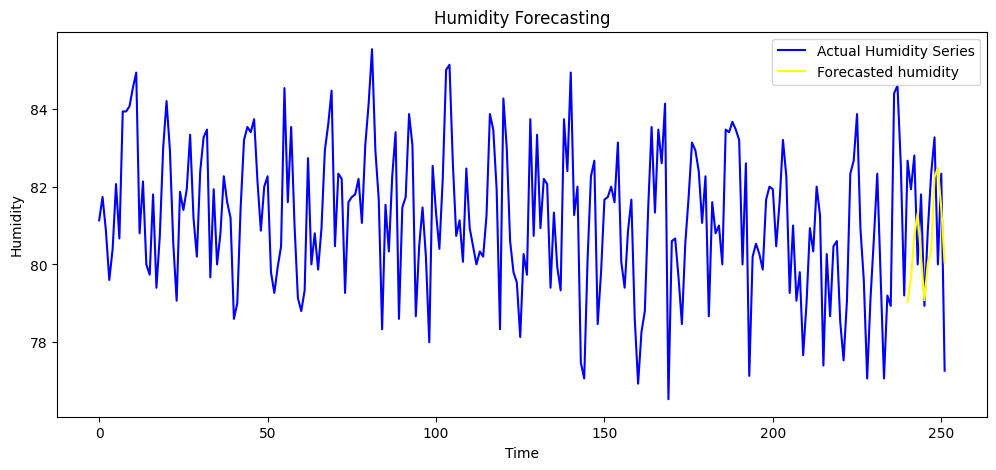

In [510]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để vẽ
plt.figure(figsize=(12, 5))

# Vẽ chuỗi dữ liệu thực tế
plt.plot(humidity_series, color='blue', label='Actual Humidity Series')

# Vẽ chuỗi dự đoán
# Lưu ý: Cần cộng chỉ số bắt đầu của humidity_series_prediction để nó tiếp nối đúng với dữ liệu thực tế
prediction_index = range(len(humidity_series_train), len(humidity_series_train) + len(humidity_series_prediction))
plt.plot(prediction_index, humidity_series_prediction, color='yellow', label='Forecasted humidity')

# Thêm tiêu đề và nhãn
plt.title('Humidity Forecasting')
plt.xlabel('Time')
plt.ylabel('Humidity')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [511]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(humidity_series_test, humidity_series_prediction)
mape = mean_absolute_percentage_error(humidity_series_test, humidity_series_prediction)
rmse = np.sqrt(mean_squared_error(humidity_series_test, humidity_series_prediction))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 1.7536533744817528
mape - manual: 0.02160142855629046
rmse - manual: 1.986858752787138


## 3.3 Sunshine Data

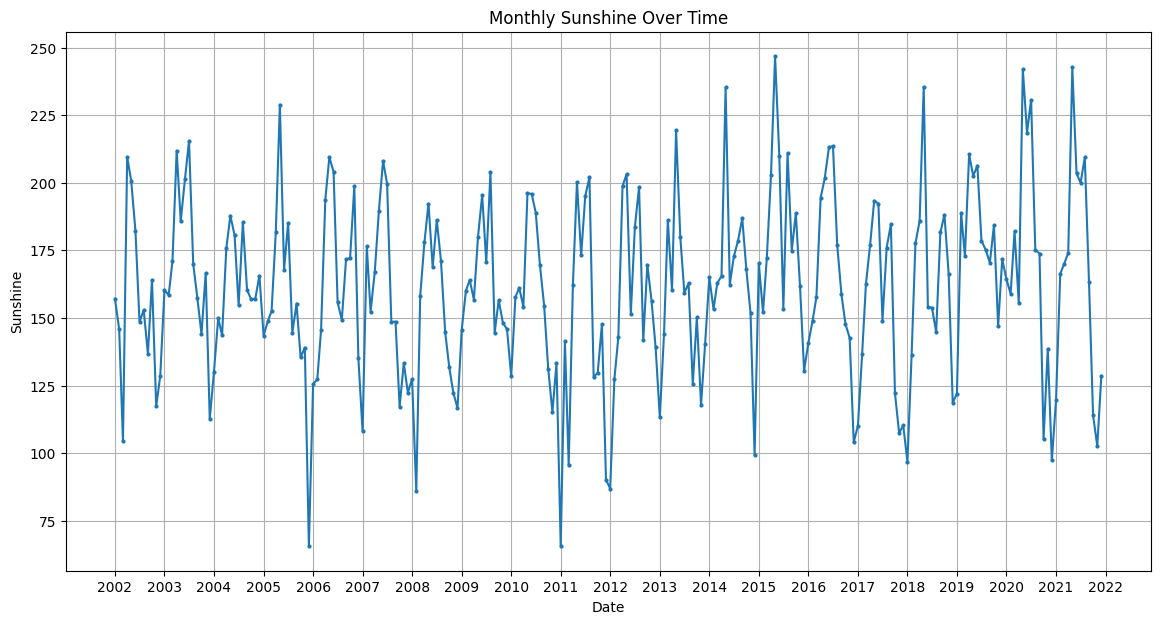

In [513]:
sunshine_df_train['Date'] = pd.to_datetime(sunshine_df_train['Date'])

plt.figure(figsize=(14, 7))
plt.plot(sunshine_df_train['Date'], sunshine_df_train['Average Sunshine'], marker='o', markersize=2)

# Setting x-axis ticks to display one tick per year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Sunshine')
plt.title('Monthly Sunshine Over Time')

plt.grid(True)
plt.show()


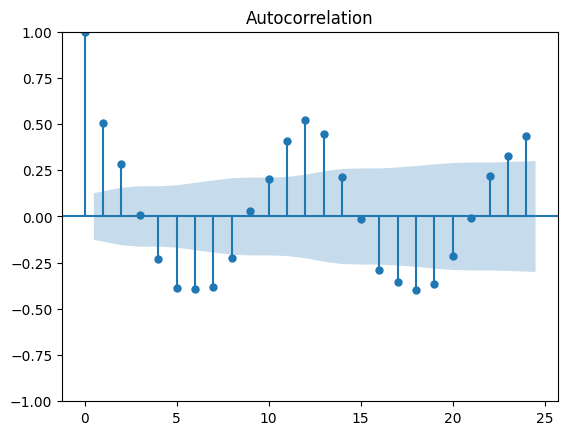

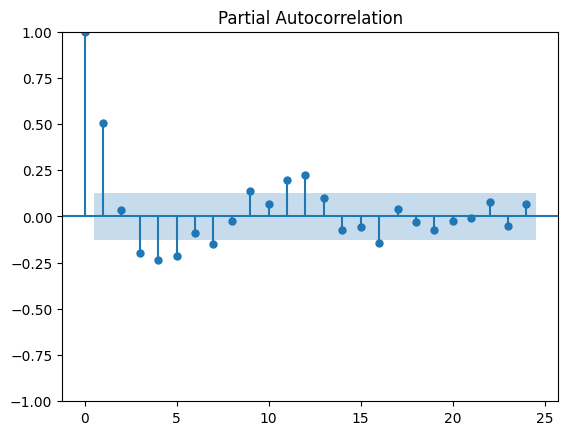

In [514]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'sunshine_df' is your DataFrame
# Select the 'sunshine' column
sunshine_series_train = sunshine_df_train['Average Sunshine']

# Plot ACF and PACF
acf_original = plot_acf(sunshine_series_train)
pacf_original = plot_pacf(sunshine_series_train)

In [515]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(sunshine_series_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.015967919914884804


In [516]:
import pmdarima as pm

auto_arima = pm.auto_arima(sunshine_series_train, 
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           start_P=0, start_D=0, start_Q=0,  # Các tham số mùa vụ ban đầu
                           max_P=3, max_D=1, max_Q=3,        # Giới hạn tham số mùa vụ
                           m=12,                             # Số giai đoạn mùa vụ, ví dụ 12 tháng cho một năm
                           seasonal=True,                    # Kích hoạt mô hình mùa vụ
                           d=0, D=None,                   # Cho phép auto_arima tự động tìm d và D
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(auto_arima.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2364.052, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2265.004, Time=0.48 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2290.343, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3133.907, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2295.088, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2260.632, Time=1.61 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=2238.502, Time=2.34 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=2251.164, Time=2.30 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=2238.533, Time=0.87 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=2257.874, Time=2.46 sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=2235.733, Time=3.06 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=2263.474, Time=1.92 sec
 ARIMA(2,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=2.36 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=2259.306, Time=0.93 sec
 ARIMA(3,0,0)(3,0,0)[12]

In [517]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Tạo mô hình SARIMA với các tham số tốt nhất
sunshine_model = ARIMA(sunshine_series_train, 
                     order=(2,0,0), 
                     seasonal_order=(3, 0, 0, 12), 
                     enforce_stationarity=False, 
                     enforce_invertibility=False)

# Huấn luyện mô hình
fitted_sunshine_model = sunshine_model.fit()

In [518]:
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Lưu mô hình vào file
joblib.dump(fitted_sunshine_model, path_sunshine_model)

['D:\\Code\\BachKhoa\\Khoa Hoc Du Lieu\\eletricity-generation-predictor\\MODEL\\sunshine.pkl']

In [520]:
sunshine_series_test = sunshine_df_test['Average Sunshine']

In [521]:
# Giả sử chỉ mục của train kết thúc ở 99 và test bắt đầu từ 100
# Đây là giả định, bạn cần kiểm tra dữ liệu cụ thể của mình
print("Last index of train data:", sunshine_series_train.index[-1])
print("First index of test data:", sunshine_series_test.index[0])

# Đặt lại chỉ mục cho test data để nó tiếp nối sau train data
start_index = sunshine_series_train.index[-1] + 1  # bắt đầu sau index cuối của train
end_index = start_index + len(sunshine_series_test)  # kết thúc sau đó bằng độ dài của test
sunshine_series_test.index = range(start_index, end_index)

# Nối hai series
sunshine_series = pd.concat([sunshine_series_train, sunshine_series_test])

# Hiển thị một số giá trị đầu và cuối để kiểm tra
print(sunshine_series.head())
print(sunshine_series.tail())


Last index of train data: 239
First index of test data: 0
0    157.133333
1    145.800000
2    104.400000
3    209.600000
4    200.533333
Name: Average Sunshine, dtype: float64
247    184.360000
248    150.546667
249    153.026667
250    156.140000
251    108.173333
Name: Average Sunshine, dtype: float64


In [522]:
# Tải mô hình từ file
loaded_sunshine_model = joblib.load(path_sunshine_model)

sunshine_series_prediction = loaded_sunshine_model.forecast(len(sunshine_series_test))

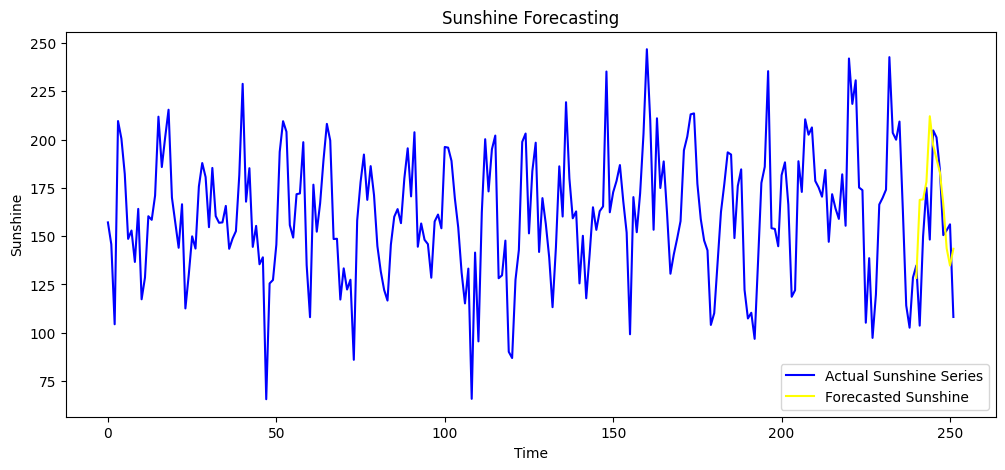

In [524]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để vẽ
plt.figure(figsize=(12, 5))

# Vẽ chuỗi dữ liệu thực tế
plt.plot(sunshine_series, color='blue', label='Actual Sunshine Series')

# Vẽ chuỗi dự đoán
# Lưu ý: Cần cộng chỉ số bắt đầu của sunshine_series_prediction để nó tiếp nối đúng với dữ liệu thực tế
prediction_index = range(len(sunshine_series_train), len(sunshine_series_train) + len(sunshine_series_prediction))
plt.plot(prediction_index, sunshine_series_prediction, color='yellow', label='Forecasted Sunshine')

# Thêm tiêu đề và nhãn
plt.title('Sunshine Forecasting')
plt.xlabel('Time')
plt.ylabel('Sunshine')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [525]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(sunshine_series_test, sunshine_series_prediction)
mape = mean_absolute_percentage_error(sunshine_series_test, sunshine_series_prediction)
rmse = np.sqrt(mean_squared_error(sunshine_series_test, sunshine_series_prediction))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 21.66868718787754
mape - manual: 0.1653219126310662
rmse - manual: 30.239094815613207


## 3.4 Rainfall Data

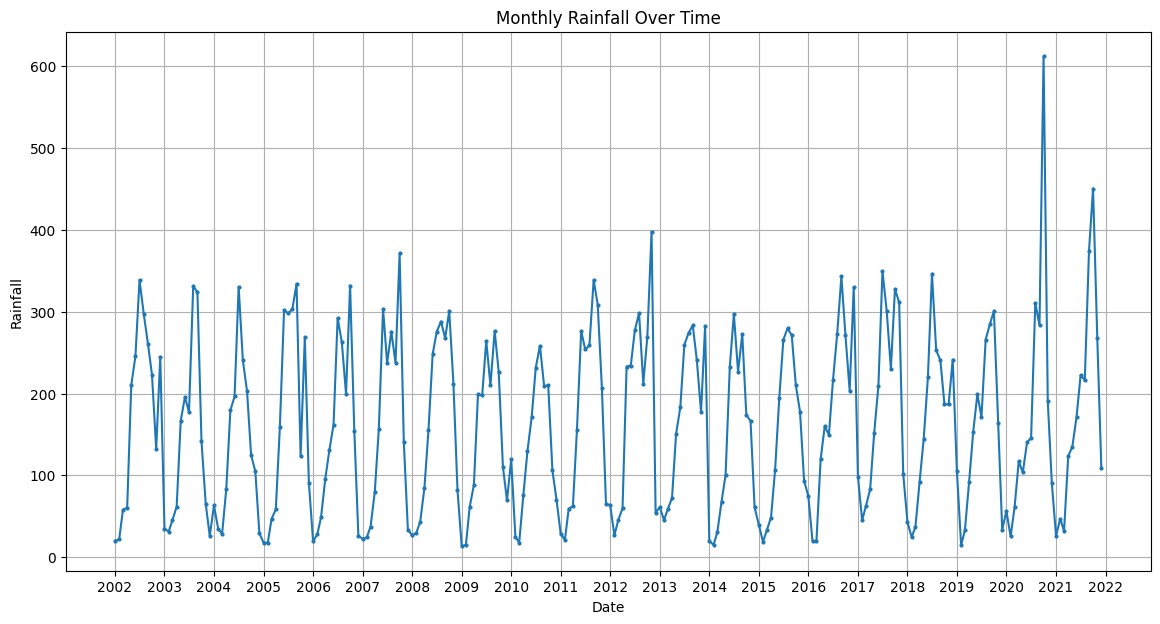

In [526]:
rainfall_df_train['Date'] = pd.to_datetime(rainfall_df_train['Date'])

plt.figure(figsize=(14, 7))
plt.plot(rainfall_df_train['Date'], rainfall_df_train['Rainfall'], marker='o', markersize=2)

# Setting x-axis ticks to display one tick per year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Monthly Rainfall Over Time')

plt.grid(True)
plt.show()


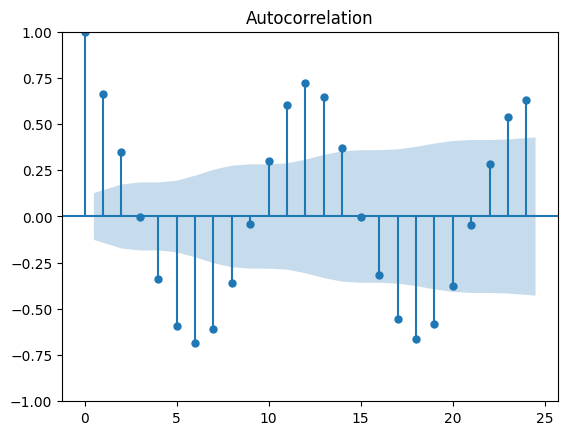

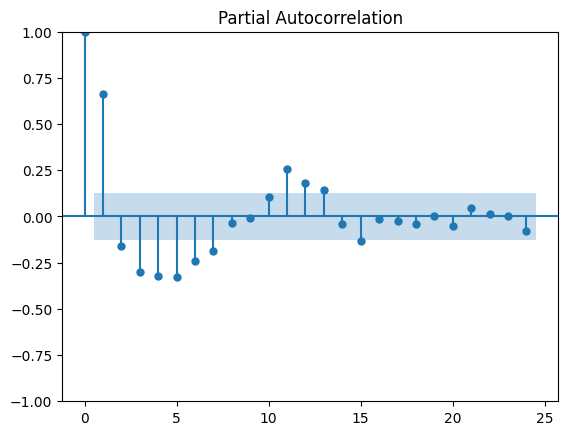

In [527]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'rainfall_df' is your DataFrame
# Select the 'rainfall' column
rainfall_series_train = rainfall_df_train['Rainfall']

# Plot ACF and PACF
acf_original = plot_acf(rainfall_series_train)
pacf_original = plot_pacf(rainfall_series_train)

In [528]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(rainfall_series_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.05704966620131037


<Axes: >

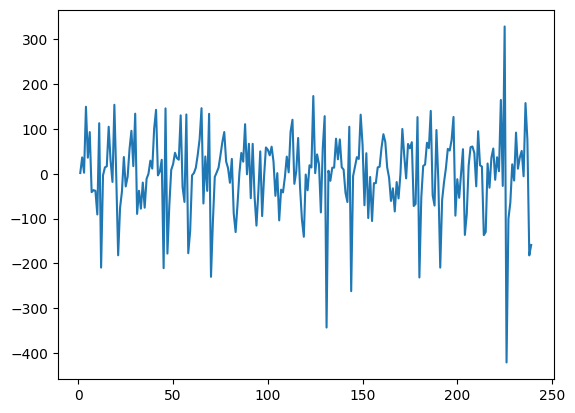

In [529]:
df_train_diff1 = rainfall_series_train.diff().dropna()
df_train_diff1.plot()

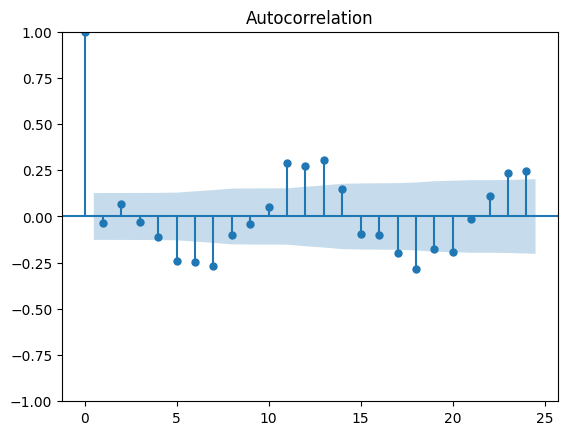

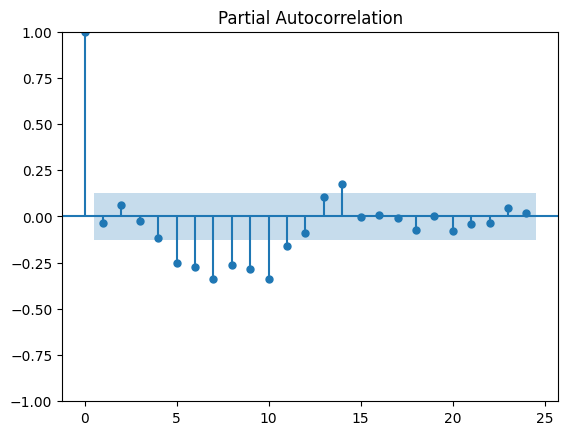

In [530]:
acf_diff1 = plot_acf(df_train_diff1)
pacf_diff1 = plot_pacf(df_train_diff1)

In [531]:
adf_test1 = adfuller(df_train_diff1)
print(f'p-value: {adf_test1[1]}')

p-value: 5.968587915188183e-11


In [540]:
import pmdarima as pm

auto_arima = pm.auto_arima(rainfall_series_train, 
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           start_P=0, start_D=0, start_Q=0,  # Các tham số mùa vụ ban đầu
                           max_P=5, max_D=1, max_Q=5,        # Giới hạn tham số mùa vụ
                           m=12,                             # Số giai đoạn mùa vụ, ví dụ 12 tháng cho một năm
                           seasonal=True,                    # Kích hoạt mô hình mùa vụ
                           d=1, D=None,                   # Cho phép auto_arima tự động tìm d và D
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(auto_arima.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2829.241, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2792.407, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2810.942, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2827.245, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2830.959, Time=0.00 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2771.730, Time=0.30 sec
 ARIMA(1,1,0)(3,0,0)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,0)(3,0,1)[12] intercept   : AIC=inf, Time=2.43 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=2801.606, Time=0.16 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=2759.343, Time=0.50 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=2781.889, Time=0.17 sec
 ARIMA(2,1,0)(3,0,0)[12] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=i

In [533]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Tạo mô hình SARIMA với các tham số tốt nhất
rainfall_model = ARIMA(rainfall_series_train, 
                     order=(2,1,0), 
                     seasonal_order=(1,0,1,12), 
                     enforce_stationarity=False, 
                     enforce_invertibility=False)

# Huấn luyện mô hình
fitted_rainfall_model = rainfall_model.fit()

In [534]:
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Lưu mô hình vào file
joblib.dump(fitted_rainfall_model, path_rainfall_model)

['D:\\Code\\BachKhoa\\Khoa Hoc Du Lieu\\eletricity-generation-predictor\\MODEL\\rainfall.pkl']

In [535]:
rainfall_series_test = rainfall_df_test['Rainfall']

In [536]:
# Giả sử chỉ mục của train kết thúc ở 99 và test bắt đầu từ 100
# Đây là giả định, bạn cần kiểm tra dữ liệu cụ thể của mình
print("Last index of train data:", rainfall_series_train.index[-1])
print("First index of test data:", rainfall_series_test.index[0])

# Đặt lại chỉ mục cho test data để nó tiếp nối sau train data
start_index = rainfall_series_train.index[-1] + 1  # bắt đầu sau index cuối của train
end_index = start_index + len(rainfall_series_test)  # kết thúc sau đó bằng độ dài của test
rainfall_series_test.index = range(start_index, end_index)

# Nối hai series
rainfall_series = pd.concat([rainfall_series_train, rainfall_series_test])

# Hiển thị một số giá trị đầu và cuối để kiểm tra
print(rainfall_series.head())
print(rainfall_series.tail())


Last index of train data: 239
First index of test data: 0
0     20.0285
1     21.6108
2     58.0542
3     60.3292
4    209.9270
Name: Rainfall, dtype: float64
247    303.686667
248    412.233333
249    373.926667
250    179.473333
251    148.560000
Name: Rainfall, dtype: float64


In [537]:
# Tải mô hình từ file
loaded_rainfall_model = joblib.load(path_rainfall_model)

rainfall_series_prediction = loaded_rainfall_model.forecast(len(rainfall_series_test))

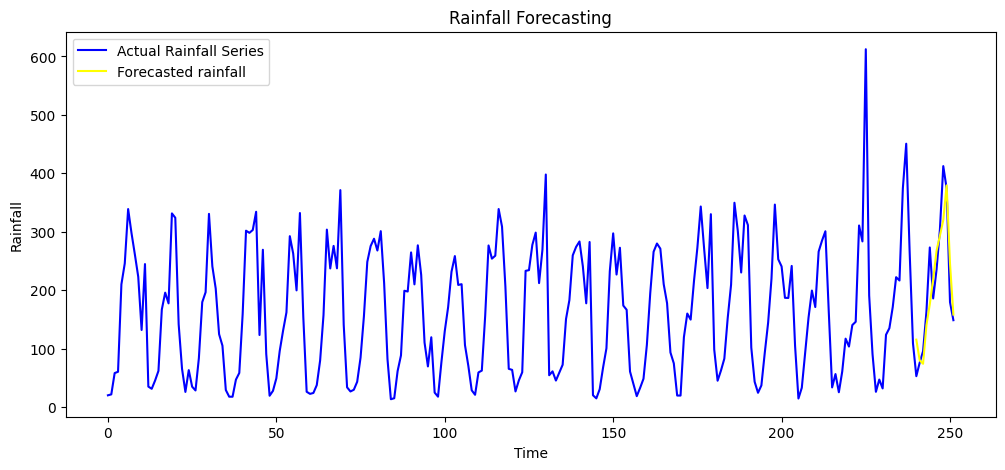

In [538]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để vẽ
plt.figure(figsize=(12, 5))

# Vẽ chuỗi dữ liệu thực tế
plt.plot(rainfall_series, color='blue', label='Actual Rainfall Series')

# Vẽ chuỗi dự đoán
# Lưu ý: Cần cộng chỉ số bắt đầu của rainfall_series_prediction để nó tiếp nối đúng với dữ liệu thực tế
prediction_index = range(len(rainfall_series_train), len(rainfall_series_train) + len(rainfall_series_prediction))
plt.plot(prediction_index, rainfall_series_prediction, color='yellow', label='Forecasted rainfall')

# Thêm tiêu đề và nhãn
plt.title('Rainfall Forecasting')
plt.xlabel('Time')
plt.ylabel('Rainfall')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [539]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(rainfall_series_test, rainfall_series_prediction)
mape = mean_absolute_percentage_error(rainfall_series_test, rainfall_series_prediction)
rmse = np.sqrt(mean_squared_error(rainfall_series_test, rainfall_series_prediction))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 38.078530693807835
mape - manual: 0.24829106224638076
rmse - manual: 49.63563545798108
